In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirBNBReviews.csv') #import in the file
pd.set_option('display.max_colwidth', None)

In [3]:
df.head()

,Genre,Review,Positive or Negative
0,Location,"The location of this Airbnb was perfect, close to all the popular attractions.",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding, everything was spotless.",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated was vibrant and full of life.,1.0
3,Security,I felt completely safe and secure during my stay at this Airbnb.,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like a home away from home.",1.0


In [4]:
df.describe()

,Positive or Negative
count,341.000000
mean,0.328446
std,0.470338
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.shape #shape of the dataset, rows and columns

(354, 3)

In [6]:
df.Genre.unique() #how many unique values for the Genre column

array([' Location', ' Cleanliness', ' Neighborhood', ' Security',
       ' Pet Friendliness', ' Host', nan], dtype=object)

In [7]:
df['Positive or Negative'].unique() #unique values for the positive or nagetives

array([ 1.,  0., nan])

In [8]:
df.rename(columns={'Positive or Negative':'PN'}, inplace=True) #rename the column

In [9]:
df.duplicated().value_counts() #count of duplicates

False    305
True      49
Name: count, dtype: int64

In [10]:
df = df.drop_duplicates() #drop rows that are duplicated

In [11]:
df.shape #recheck the rows and columns

(305, 3)

In [12]:
df.isna().sum() #check for the number of nulls

Genre     1
Review    1
PN        1
dtype: int64

In [13]:
df[df['Genre'].isna()] #check for the rows with null

,Genre,Review,PN
36,NaN,NaN,NaN


In [14]:
df = df.dropna() #remove null values/rows

In [15]:
df[df['Genre'].isna()] #recheck the null values/rows

,Genre,Review,PN


In [16]:
df.head()

,Genre,Review,PN
0,Location,"The location of this Airbnb was perfect, close to all the popular attractions.",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding, everything was spotless.",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated was vibrant and full of life.,1.0
3,Security,I felt completely safe and secure during my stay at this Airbnb.,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like a home away from home.",1.0


[Text(0, 0, ' Location'),
 Text(1, 0, ' Cleanliness'),
 Text(2, 0, ' Neighborhood'),
 Text(3, 0, ' Security'),
 Text(4, 0, ' Pet Friendliness'),
 Text(5, 0, ' Host')]

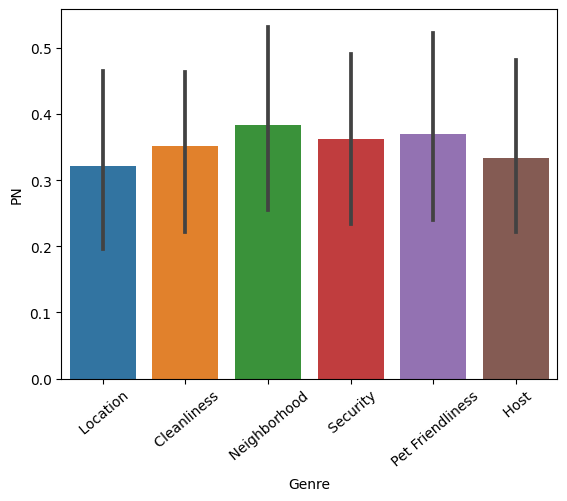

In [17]:
ax = sns.barplot(data=df, x= 'Genre', y='PN')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, size = 10)

In [18]:
import nltk

In [19]:
df.shape

(304, 3)

<Axes: title={'center': 'Count of Genres'}, xlabel='Genre'>

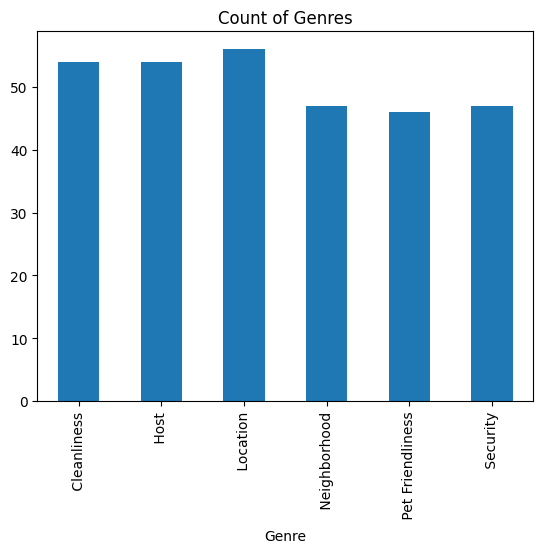

In [20]:
df.Genre.value_counts().sort_index().plot(kind='bar', title = 'Count of Genres')

<Axes: title={'center': 'Count of Types Of Review'}, xlabel='Positve or Negative', ylabel='Count'>

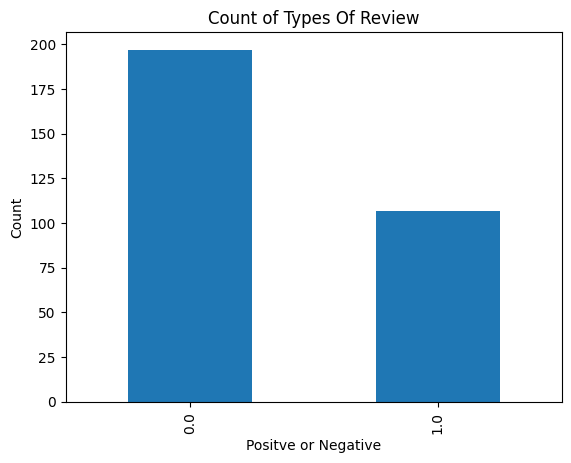

In [21]:
df.PN.value_counts().plot(kind='bar', title='Count of Types Of Review', xlabel='Positve or Negative', ylabel='Count')

In [22]:
example = df.Review[50]
example

'The Airbnb was well-maintained and cleaned regularly, ensuring a comfortable stay. '

In [23]:
nltk.word_tokenize(example) #tokenize or break down the sentence

['The',
 'Airbnb',
 'was',
 'well-maintained',
 'and',
 'cleaned',
 'regularly',
 ',',
 'ensuring',
 'a',
 'comfortable',
 'stay',
 '.']

In [24]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The',
 'Airbnb',
 'was',
 'well-maintained',
 'and',
 'cleaned',
 'regularly',
 ',',
 'ensuring',
 'a']

In [25]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('Airbnb', 'NNP'),
 ('was', 'VBD'),
 ('well-maintained', 'JJ'),
 ('and', 'CC'),
 ('cleaned', 'VBD'),
 ('regularly', 'RB'),
 (',', ','),
 ('ensuring', 'VBG'),
 ('a', 'DT')]

In [26]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  (ORGANIZATION Airbnb/NNP)
  was/VBD
  well-maintained/JJ
  and/CC
  cleaned/VBD
  regularly/RB
  ,/,
  ensuring/VBG
  a/DT
  comfortable/JJ
  stay/NN
  ./.)


# Step 1: Vader Sentiment Scoring

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm, trange
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores('I am so happy') #check sentiment from the words. compound value is from -1 to 0 (negative to positive)

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [29]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [30]:
example

'The Airbnb was well-maintained and cleaned regularly, ensuring a comfortable stay. '

In [31]:
sia.polarity_scores(example) #shows 'example' as a more positive sentiment

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597}

In [32]:
df.columns

Index(['Genre', 'Review', 'PN'], dtype='object')

In [33]:
df["Id"] = df.index + 1

In [34]:
df.head()

,Genre,Review,PN,Id
0,Location,"The location of this Airbnb was perfect, close to all the popular attractions.",1.0,1
1,Cleanliness,"The cleanliness of the Airbnb was outstanding, everything was spotless.",1.0,2
2,Neighborhood,The neighborhood where this Airbnb is situated was vibrant and full of life.,1.0,3
3,Security,I felt completely safe and secure during my stay at this Airbnb.,1.0,4
4,Pet Friendliness,"They were so welcoming to my pet, it felt like a home away from home.",1.0,5


In [35]:
df.dtypes

Genre      object
Review     object
PN        float64
Id          int64
dtype: object

In [36]:
#Run the polarity score on the entire dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['Genre']
    myId=row['Id']
    res[myId] = sia.polarity_scores(text)
    
    

  0%|          | 0/304 [00:00<?, ?it/s]

In [37]:
res

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34},
 5: {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34},
 11: {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34},
 17: {'neg': 0.0, 'neu': 0.25, 'pos'

In [38]:
vaders = pd.DataFrame(res).T

In [39]:
vaders.reset_index().rename(columns={'index': 'Id'})
vaders.head()

,neg,neu,pos,compound
1,0.0,1.00,0.00,0.0000
2,0.0,1.00,0.00,0.0000
3,0.0,1.00,0.00,0.0000
4,0.0,0.00,1.00,0.3400
5,0.0,0.25,0.75,0.4588


In [40]:
vaders['Id'] = vaders.index
vaders.head()

,neg,neu,pos,compound,Id
1,0.0,1.00,0.00,0.0000,1
2,0.0,1.00,0.00,0.0000,2
3,0.0,1.00,0.00,0.0000,3
4,0.0,0.00,1.00,0.3400,4
5,0.0,0.25,0.75,0.4588,5


In [41]:
df.head()

,Genre,Review,PN,Id
0,Location,"The location of this Airbnb was perfect, close to all the popular attractions.",1.0,1
1,Cleanliness,"The cleanliness of the Airbnb was outstanding, everything was spotless.",1.0,2
2,Neighborhood,The neighborhood where this Airbnb is situated was vibrant and full of life.,1.0,3
3,Security,I felt completely safe and secure during my stay at this Airbnb.,1.0,4
4,Pet Friendliness,"They were so welcoming to my pet, it felt like a home away from home.",1.0,5


In [42]:
#merge the sentiment score with the original dataset
vaders = vaders.merge(df, how='right')
vaders

,neg,neu,pos,compound,Id,Genre,Review,PN
0,0.0,1.00,0.00,0.0000,1,Location,"The location of this Airbnb was perfect, close to all the popular attractions.",1.0
1,0.0,1.00,0.00,0.0000,2,Cleanliness,"The cleanliness of the Airbnb was outstanding, everything was spotless.",1.0
2,0.0,1.00,0.00,0.0000,3,Neighborhood,The neighborhood where this Airbnb is situated was vibrant and full of life.,1.0
3,0.0,0.00,1.00,0.3400,4,Security,I felt completely safe and secure during my stay at this Airbnb.,1.0
4,0.0,0.25,0.75,0.4588,5,Pet Friendliness,"They were so welcoming to my pet, it felt like a home away from home.",1.0
...,...,...,...,...,...,...,...,...
299,0.0,1.00,0.00,0.0000,350,Host,"Unfortunately, the host was unresponsive and lacked the necessary professionalism, impacting my overall experience.",0.0
300,0.0,1.00,0.00,0.0000,351,Host,I experienced difficulties in reaching the host when I needed assistance or had questions during my stay.,0.0
301,0.0,1.00,0.00,0.0000,352,Host,"The host was unaccommodating and did not adequately address my concerns, which was disappointing.",0.0
302,0.0,1.00,0.00,0.0000,353,Host,"I felt unwelcome by the host, with minimal communication and a lack of support throughout my visit.",0.0


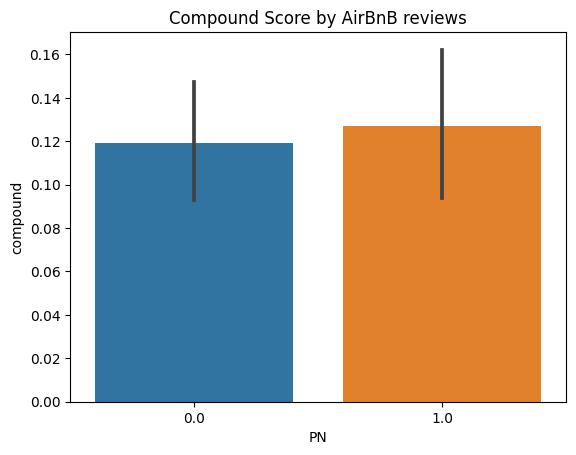

In [43]:
#plot vader results
ax =sns.barplot(data=vaders,x = 'PN', y='compound')
ax.set_title('Compound Score by AirBnB reviews')
plt.show()

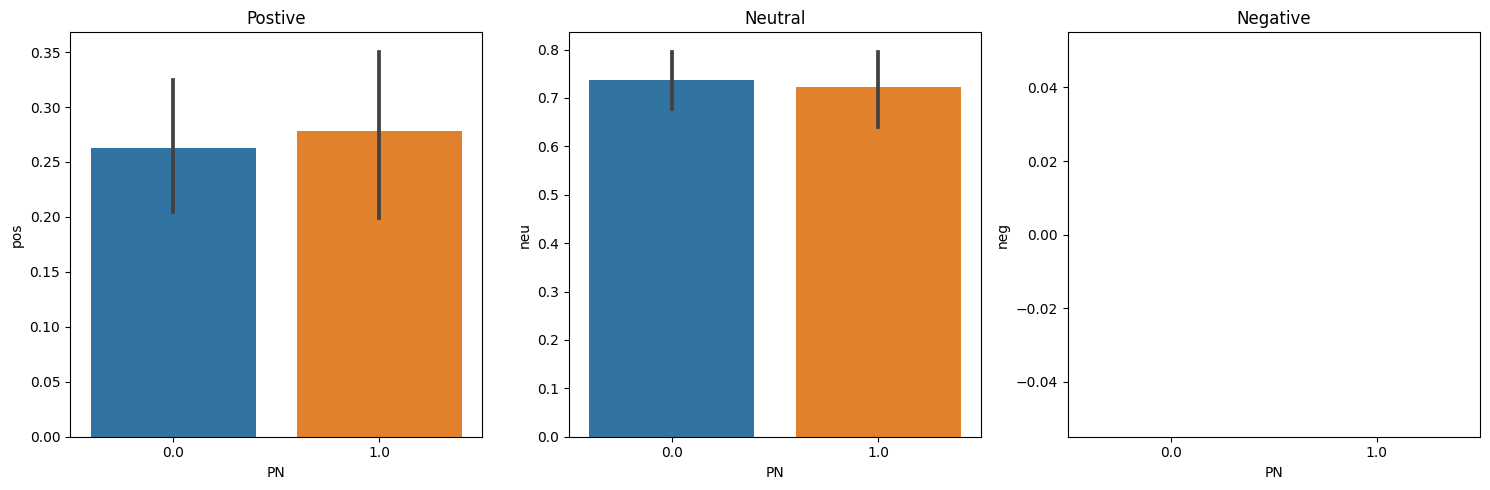

In [44]:
#plot vader results
fig, axs= plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=vaders,x = 'PN', y='pos', ax=axs[0])
sns.barplot(data=vaders,x = 'PN', y='neu', ax=axs[1])
sns.barplot(data=vaders,x = 'PN', y='neg', ax=axs[2])

axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

# Step 3 Roberta Petrained Model
Use a model trained of a large corpus of data.
transfomred models accounts for the words but also the context related to other words

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\kaudim\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaudim\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [47]:
print(example)

The Airbnb was well-maintained and cleaned regularly, ensuring a comfortable stay. 
